# 1 Plotting and Data Visualization

In this notebook we want to get familiar with plotting and the Python library `matplotlib`. Plotting is an essential tool for data exploration that can help you to get an intuition about certain characteristics and features of data.


[Matplotlib](https://matplotlib.org/) is probably the most widely used Python library and will be the one we are using in this course. However, there are also other alternatives that might be interesting for you, for instance [Seaborn](https://seaborn.pydata.org/) or [Plotly](https://plotly.com/) (for this course, we expect you to stick to matplotlib).

Let's install and import `matplotlib`:

In [2]:
!pip install matplotlib==3.5.1

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np #numpy will always have our back

## 1.1 Obtaining a dataset

For illustration purposes, we will use datasets that are canon in machine learning and data science. Those datasets are already preprocessed and easily obtainable through the [scikit-learn](https://scikit-learn.org/stable/) library.

Now, let's install and import `scikit-learn` and load the dataset.

In [4]:
!pip install scikit-learn==1.0.2

In [5]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

Now we have the Diabetes Patients dataset. Let's try to explore it with ```matplotlib```.

In [6]:
print(diabetes["data"].shape)

(442, 10)


As you can see, we have 442 samples with 10 features (Actually, there is an 11th feature, the target, which denotes the response variable, a measure of disease progression one year after baseline). Now, have a look at what features we are dealing with:

In [7]:
print(diabetes["feature_names"])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


Some of the given abbreviations may seem rightfully cryptic to you, more information can be found in the dataset description:

In [8]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## 1.2 Visualize features

Now, we want to get to know more about a feature, how it is distributed, and what we can learn from it. Therefore, we will pick out one of the features and plot them in different ways. 

As an example feature, we will take "bp", the blood pressure measurement.

### Task 1.2.1: Get the feature
Isolate the feature "bp" from the data and save the vector into the provided variable _bp_.

In [147]:
bp = diabetes.data[:, 3]

### Task 1.2.2: Describe the data
Use the skills you learnt in the lecture and the last assignment (and `numpy`), to extract meaningful properties from the data:
- Attribute type (scale) of the data
- Mean
- Median
- Maximum value
- Minimum value
- Variance

_Note that the data of this ready-to-use dataset have been already mean centered and scaled proportional to standard deviation. However, extracting the common properties like mean, median etc. helps you to have a good first impression of the data._)

In [149]:
# interval scaled -> no zero point
bp_mean = np.mean(bp)
bp_median = np.median(bp)
bp_max = np.max(bp)
bp_min = np.min(bp)
bp_var = np.var(bp)

### Task 1.2.3: Show the distribution
Now, we are interested in the distribution of blood pressure in diabetes patients and therefore want to sort patients' blood pressure data into "buckets" in a histogram. 

_Have a look at the sample plots in on the [matplotlib website](https://matplotlib.org/stable/gallery/statistics/histogram_features.html)._

**Do not forget to label your axes correctly and give your plot a suitable title!**

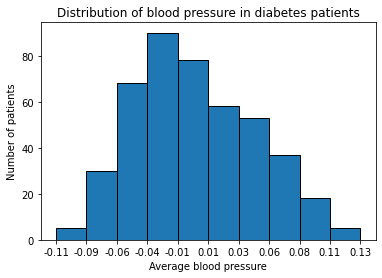

In [183]:
# Easy Solution
# plt.hist(bp)
# plt.title("Distribution of Blood Pressure in Diabetes Patients")
# plt.ylabel("Number of Patients")
# plt.xlabel("Normalized Blood Pressure")
# plt.show()

# Better Solution
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots()
# Ec -> edge color
_, bins, _ = ax.hist(bp, ec='black')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 2 decimal places.
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))

plt.title("Distribution of blood pressure in diabetes patients")
plt.xlabel("Average blood pressure")
plt.ylabel("Number of patients")
plt.show()

### Bonus Task 1.2.4: What type of function could describe the data approximately?

In [184]:
# Poisson Distribution (Positively skewed data)

### Task 1.2.5: Show the boxplot and describe it
Now that you know how to plot with matplotlib, you are tasked to create a box and whiskers plot of the data. Have a look at the [official matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) if you need some guidance. Additionally, give a quick description of the plot and what you learn from it about the data, especially in terms of _outliers_.

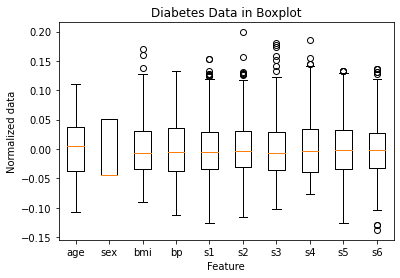

"\nIt shows that there are some outliers for each feature (excluding obviously the sex). Only the age and the s5 feature have some to none which means that\nthere is most likely only a selected agespan for the data. Also s5 is not likely to be not in the norm. Lastly the bp feature has no outliers aswell. This shows that there is probably \nno abnormal bloodpressure meassured or that many times that it is already the same as the normal value amount.\n\nThere are outliers for most of the features. These are almost exclusivly in the positive range except for the 's6'-feature.\nAge, sex and bp have no outliers.\n"

In [207]:
plt.boxplot(diabetes.data, labels=diabetes["feature_names"])
plt.title("Diabetes Data in Boxplot")
plt.xlabel("Feature")
plt.ylabel("Normalized data")
plt.show()
#plt.xlabel("Blood Pressure Feature")
#plt.ylabel("Normalized Blood Pressure")
#plt.boxplot(bp)

"""
It shows that there are some outliers for each feature (excluding obviously the sex). Only the age and the s5 feature have some to none which means that
there is most likely only a selected agespan for the data. Also s5 is not likely to be not in the norm. Lastly the bp feature has no outliers aswell. This shows that there is probably 
no abnormal bloodpressure meassured or that many times that it is already the same as the normal value amount.

There are outliers for most of the features. These are almost exclusivly in the positive range except for the 's6'-feature.
Age, sex and bp have no outliers.
"""

## 1.3 Visualize 2D data
After we have looked at the characteristics of a single feature, let's see how `matplotlib` can help to visualise two-dimensional data and single samples. Prominent 2D data are greyscale photos or images, where the two dimensions are the x and y positions of the pixel values.

### 1.3.1 Obtain an image dataset
Fortunately, `scikit-learn` also provides a dataset with pixel images as samples.

In [45]:
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


Let's go the usual route and have a look at the shape of the data.

In [15]:
print(digits["data"].shape)

(1797, 64)


So, we have 1797 samples with 64 features each. That means, if we isolate a feature vector for a single sample, it has 64 features. But aren't we dealing with images that are usually 2-dimensional?

Perhaps the feature names can give more insight:

In [16]:
print(digits["feature_names"])

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


From the feature names, we can conclude that the pixel values are represented in a vector, row for row. In order to plot it as a picture, we need a 2D representation, though.

Therefore our tasks are now: 
- 1.) isolate the feature vector of a single sample
- 2.) reshape the vector into a 2D matrix
- 3.) plot the image using `matplotlib`

### Task 1.3.1 Isolate a feature vector
This task can be seen as the "inverse" of task 1.2.1. But now, instead of a single feature over all samples, we want all the features for a single sample!

Isolate a sample of your choice and save it in the variable _digit_.

In [169]:
digit = digits["data"][0, :]
print(digit.shape)

(64,)


### Task 1.3.2 Reshape the vector into a 2D matrix
Now, you should have a vector of length 64. The image samples of the dataset are square. So now you need to reshape the vector into the appropriate shape using Numpy. Save the resulting matrix into the variable _im_.

Hint: a helpful function is [numpy.reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

In [170]:
im = digit.reshape(8, 8)
print(im.shape)

(8, 8)


### Task 1.3.3 Plot the image
Use the skills obtained above to plot the sample using the ```imshow``` [function from matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).

**Keep in mind: No plot without title and axes labels!**

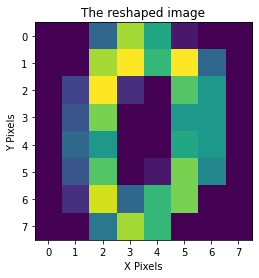

In [206]:
# aspect='equal' -> make pixel square
plt.imshow(im, aspect='equal')
# Dont skip Pixels in scale
plt.xticks(np.arange(len(im)))
plt.title("The reshaped image")
plt.ylabel("Y Pixels")
plt.xlabel("X Pixels")
plt.show()

## Task 1.4 Visual recognition of correlations

In this task your job is to plot different attributes against each other in a scatterplot to find out if the selected attributes are linearly correlated.

### Task 1.4.1 BMI and Blood Pressure

We assume a positive correlation between the body mass index (BMI) of a person and their blood pressure.
Plot the asscociated attributes against each other and analyze the plot to find out if this is true.

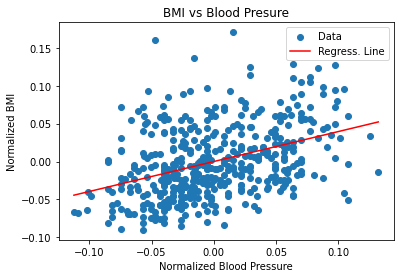

In [205]:
fig, ax = plt.subplots()
bmi = diabetes.data[:, 2]
ax.scatter(bp, bmi, label="Data")
# np.unique -> Unique value from array
# np.poly1d -> Least squared polynominal fit
# function found on internet (not needed but helpful)
plt.plot(np.unique(bp), np.poly1d(np.polyfit(bp, bmi, 1))(np.unique(bp)), color="red", label="Regress. Line")
plt.legend()
plt.title("BMI vs Blood Presure")
plt.xlabel("Normalized Blood Pressure")
plt.ylabel("Normalized BMI")
plt.show()


# Yes since the curve has a positive pitch

### Task 1.4.2 Age and Diabetes Disease Progression

As a layman, one could assume that the older a patient is, the worse their status of diabetes progression. Therefore, we assume that both features have a positive linear correlation. Plot the asscociated attributes against each other and analyze the plot to find out if this assumption is true.

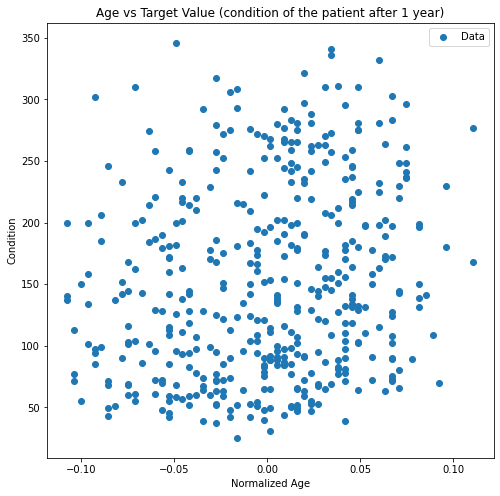

In [204]:
plt.figure(figsize=[8, 8])
target = diabetes["target"]
age = diabetes.data[:, 0]
plt.scatter(age, target, label="Data")
# ax.plot(np.unique(age), np.poly1d(np.polyfit(age, target, 1))(np.unique(age)), color="red", label="Regress. Line")
plt.legend()
plt.title("Age vs Target Value (condition of the patient after 1 year)")
plt.xlabel("Normalized Age")
plt.ylabel("Condition")
plt.show()


# Without the regression line there is no correlation visible because the points are too scattered and there is no orientation

### Task 1.4.3 High-Density Lipoproteins and Diabetes Disease Progression
Some correlations between features might be difficult to estimate/assume when dealing with new data. Let's explore the influence on high-density lipoproteins on diabetes disease progression.

Plot the asscociated attributes against each other and analyze the plot to find out if there is some correlation.

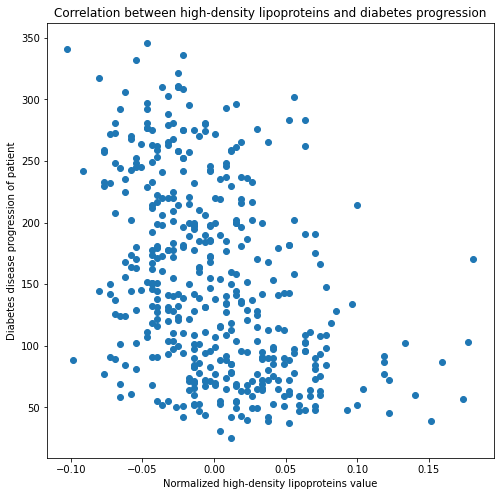

In [219]:
# Take all features from s1 to s6 -> num_features = 6
# num_features = len(diabetes["feature_names"][4:])
# fig, axes = plt.subplots(num_features, figsize=[8, 25])

# # Add Subplots
# for x in range(0, num_features):
#     x_val = diabetes["data"][:, x + 4]
#     axes[x].scatter(x_val, target)
#     axes[x].plot(np.unique(x_val), np.poly1d(np.polyfit(x_val, target, 1))(np.unique(x_val)), color="red", label="Regress. Line")
#     axes[x].set_title(diabetes["feature_names"][x + 4] + " vs. target")
    
# fig.suptitle("S1-6 vs Condition after one year\n")
# fig.supylabel("Condition of patient")
# fig.supxlabel("Normalized Feature Value")
# plt.tight_layout()
# plt.show()

x_val = diabetes["data"][:, 6]
plt.figure(figsize=[8, 8])
plt.scatter(x_val, target)
plt.title("Correlation between high-density lipoproteins and diabetes progression")
plt.ylabel("Diabetes disease progression of patient")
plt.xlabel("Normalized high-density lipoproteins value")
plt.show()
    
# Lipoproteins (s3) vs target_value has a negative correlation.